# Homework Unsupervised Learning
## Modelling Experiments - Data Set Airline Customer Value Analysis Case
## Group 8 : Decentraland
**Group Member:**
- Dharma Setiawan
- Ilham Ibnu A.
- M. Farhan Atmawinanda
- Fikri Diva S.
- Ahmad Ilham H.

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

# Dataset Description

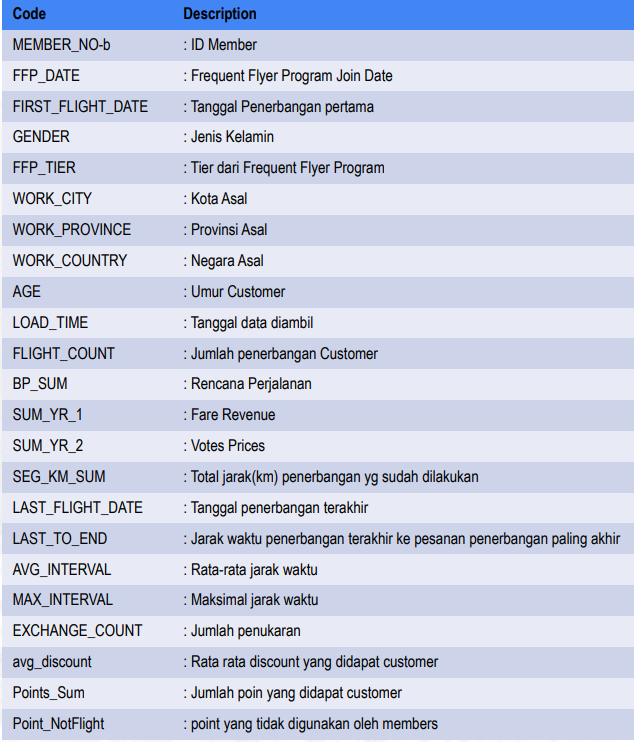

# Load Dataset

In [ ]:
url_dataset = "https://raw.githubusercontent.com/fikridivas/Dataset-homework-rakamin/main/flight.csv"
df_flight = pd.read_csv(url_dataset)
df_flight.head()

MEMBER_NO   FFP_DATE  ... Points_Sum Point_NotFlight
0      54993  11/2/2006  ...     619760              50
1      28065  2/19/2007  ...     415768              33
2      55106   2/1/2007  ...     406361              26
3      21189  8/22/2008  ...     372204              12
4      39546  4/10/2009  ...     338813              39

[5 rows x 23 columns]

# EDA

## Descriptive Statistics

In [ ]:
df_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [ ]:
df_flight.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

Pengamatan:
1. Data terdiri dari 62988 baris
2. Tampak beberapa column masih memiliki nilai null / missing value. `GENDER`, `WORK_CITY`, `WORK_PROVINCE`, `WORK_COUNTRY`, `AGE`, `SUM_YR_1`,`SUM_YR_2` adalah kolom-kolom yang memiliki missing value.
3. Tidak ada type data yang tidak sesuai untuk setiap kolom dataset

## Cek duplicated Data

In [ ]:
df_flight.duplicated().sum()

0

Tidak ada data yang duplicated

## Sampel Data

In [ ]:
# membagi data berdasarkan type datanya
category = df_flight.select_dtypes(include='object')
numerical = df_flight.select_dtypes(exclude='object')

numerical_cols = numerical.columns.to_list()
category_cols = category.columns.to_list()

print("Data numerik: ", numerical_cols)
print("Data category: ", category_cols)

Data numerik:  ['MEMBER_NO', 'FFP_TIER', 'AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL', 'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight']
Data category:  ['FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'LOAD_TIME', 'LAST_FLIGHT_DATE']


In [ ]:
df_flight[numerical_cols].describe()

MEMBER_NO      FFP_TIER  ...   Points_Sum  Point_NotFlight
count  62988.000000  62988.000000  ...   62988.0000     62988.000000
mean   31494.500000      4.102162  ...   12545.7771         2.728155
std    18183.213715      0.373856  ...   20507.8167         7.364164
min        1.000000      4.000000  ...       0.0000         0.000000
25%    15747.750000      4.000000  ...    2775.0000         0.000000
50%    31494.500000      4.000000  ...    6328.5000         0.000000
75%    47241.250000      4.000000  ...   14302.5000         1.000000
max    62988.000000      6.000000  ...  985572.0000       140.000000

[8 rows x 15 columns]

In [ ]:
df_flight[['avg_discount']].describe()

avg_discount
count  62988.000000
mean       0.721558
std        0.185427
min        0.000000
25%        0.611997
50%        0.711856
75%        0.809476
max        1.500000

Pengamatan:
1. Kolom (`MEMBER_NO`) merupakan id member yang mana kolom ini tidak begitu berguna untuk proses modelling sehingga bisa di drop.
2. Kolom (`FLIGHT_COUNT`), (`BP_SUM`), (`SUM_YR_1`), (`SUM_YR_2`), (`SEG_KM_SUM`), (`LAST_TO_END`), (`AVG_INTERVAL`), (`MAX_INTERVAL`), (`POINT_SUM`), (`POINT_FLIGHT`) memiliki distribusi yang tidak normal.
3. Pada kolom (`avg_discount`) terdapat kejagalan dikarenakan nilai maximumnya adalah 1.5 yang mana nilai tersebut melebihi 100% (1).

In [ ]:
df_flight[category_cols].describe()

FFP_DATE FIRST_FLIGHT_DATE  ...  LOAD_TIME LAST_FLIGHT_DATE
count       62988             62988  ...      62988            62988
unique       3068              3406  ...          1              731
top     1/13/2011         2/16/2013  ...  3/31/2014        3/31/2014
freq          184                96  ...      62988              959

[4 rows x 8 columns]

Pengamatan:
1. Kolom (`FFP_DATE`), (`FIRST_FLIGHT_DATE`), (`LAST_FLIGHT_DATE`) merupakan data berbentuk date yang mana memiliki nilai unique yang banyak.
2. Kolom (`WORK_CITY`), (`WORK_EXPERIENCE`), dan (`WORK_COUNTRY`) memiliki nilai unique yang banyak sehingga kolom tersebut tidak usah dipakai untuk proses modelling.
3. Kolom (`LOAD_TIME`) merupakann data tanggal kapan data diambil, kolom ini bisa dilakukan proses feature engineering.

## Value Counting

In [ ]:
for col in category_cols:
    print(f'''Value count kolom {col}:''')
    print(df_flight[col].value_counts())
    print()

Value count kolom FFP_DATE:
1/13/2011     184
1/1/2013      165
3/1/2013      100
11/17/2010     99
1/14/2011      95
             ... 
10/4/2005       1
5/18/2009       1
11/29/2004      1
11/7/2004       1
5/19/2009       1
Name: FFP_DATE, Length: 3068, dtype: int64

Value count kolom FIRST_FLIGHT_DATE:
2/16/2013    96
9/30/2012    85
2/15/2013    84
9/9/2005     78
4/21/2012    70
             ..
3/2/2005      1
4/12/2009     1
2/20/2005     1
1/27/2005     1
12/7/2004     1
Name: FIRST_FLIGHT_DATE, Length: 3406, dtype: int64

Value count kolom GENDER:
Male      48134
Female    14851
Name: GENDER, dtype: int64

Value count kolom WORK_CITY:
guangzhou    9386
beijing      7845
shanghai     5001
shenzhen     3605
dalian       1979
             ... 
KASUGAI         1
hainan          1
xinxishi        1
KA              1
lingshui        1
Name: WORK_CITY, Length: 3234, dtype: int64

Value count kolom WORK_PROVINCE:
guangdong        17509
beijing           8014
shanghai          4998
liao

## Drop Column

In [ ]:
df_flight = df_flight.drop(['WORK_CITY','WORK_PROVINCE', 'WORK_COUNTRY'], axis = 1)

## Fill Missing Value & Wrong Value

In [ ]:
df_flight[df_flight['avg_discount']>1]

MEMBER_NO    FFP_DATE  ... Points_Sum Point_NotFlight
1          28065   2/19/2007  ...     415768              33
2          55106    2/1/2007  ...     406361              26
3          21189   8/22/2008  ...     372204              12
13         54943  10/25/2006  ...     270704              20
15          1254   3/28/2008  ...     310002               8
...          ...         ...  ...        ...             ...
60394      47454  11/22/2005  ...       2300               0
61606      51953    8/9/2012  ...       1650               0
61792      35494    3/5/2009  ...       1250               0
62168      46131    3/1/2007  ...        869               0
62913      18705   1/25/2006  ...       1300               0

[2947 rows x 20 columns]

In [ ]:
df_flight = df_flight[df_flight['avg_discount']<=1]

In [ ]:
df_flight['AGE'] = df_flight['AGE'].fillna(df_flight['AGE'].median())
df_flight['SUM_YR_1'] = df_flight['SUM_YR_1'].fillna(df_flight['SUM_YR_1'].median())
df_flight['SUM_YR_2'] = df_flight['SUM_YR_2'].fillna(df_flight['SUM_YR_2'].median())

In [ ]:
df_flight['GENDER'] = df_flight['GENDER'].fillna("Male")

In [ ]:
df_flight.isna().sum()

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
FFP_TIER             0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

## Univariate Analysis

### Box Plot

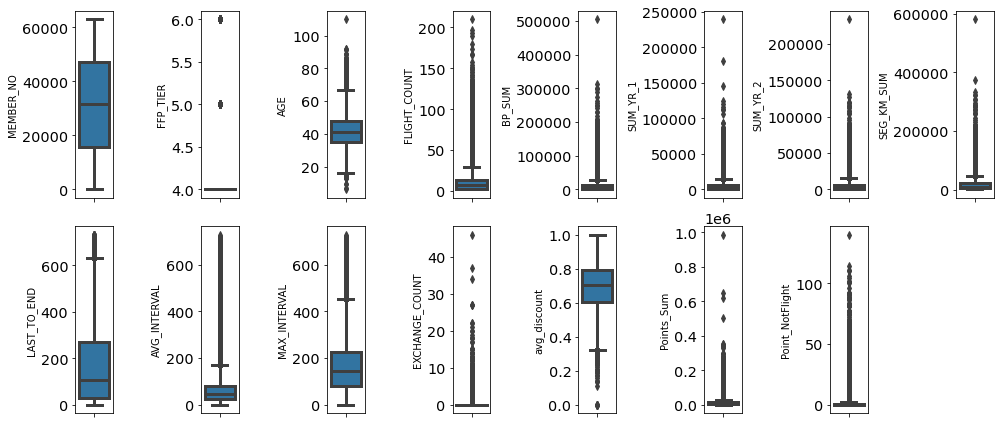

In [ ]:
plt.figure(figsize = (14,6))
for i in range(0, len(numerical_cols)):
    plt.subplot(2, 8, i+1)
    sns.boxplot(y = df_flight[numerical_cols[i]], orient='v')
    plt.tight_layout()

Pengamatan:
1. Outlier terlihat untuk semua data bertipe numerik kecuali data (`MEMBER_NO`)

### Dist Plots

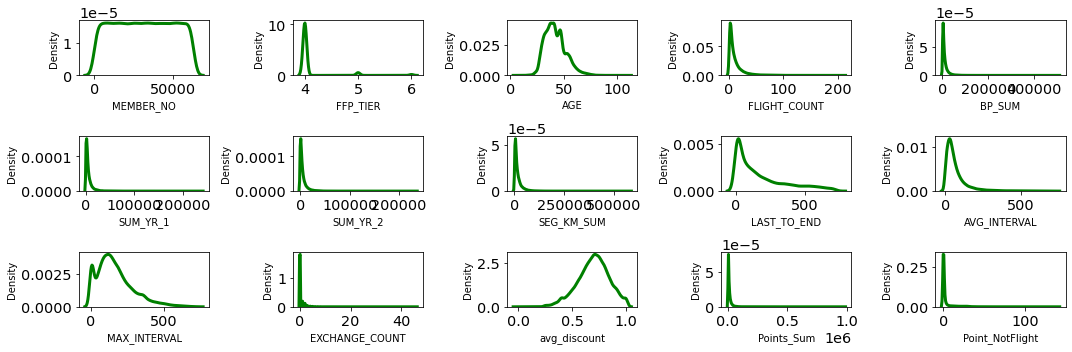

In [ ]:
features = numerical_cols
plt.figure(figsize=(15, 5))
for i in range(0, len(features)):
    plt.subplot(3, len(features)/3, i+1)
    sns.kdeplot(x=df_flight[features[i]], color='green')
    plt.xlabel(features[i])
    plt.tight_layout()

Pengamatan:
1. Data `average discount` merupakan data yang berdistribusi normal
2. Column-column yang lain memiliki distribusi right skewed.

### Count Plot

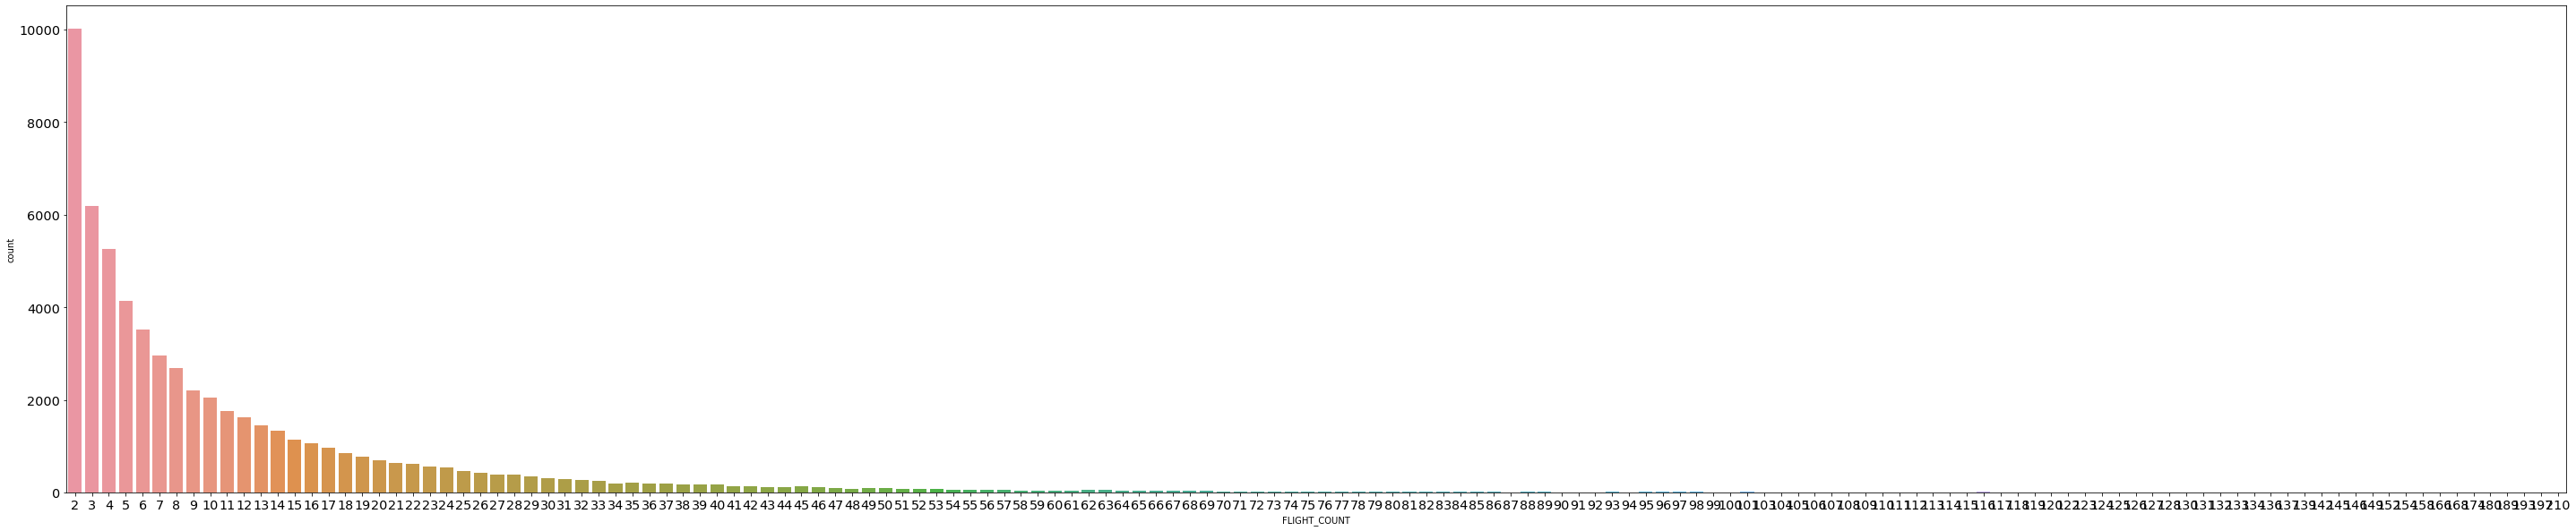

In [ ]:
plt.figure(figsize=(50,10))
ax = sns.countplot(x="FLIGHT_COUNT", data=df_flight)

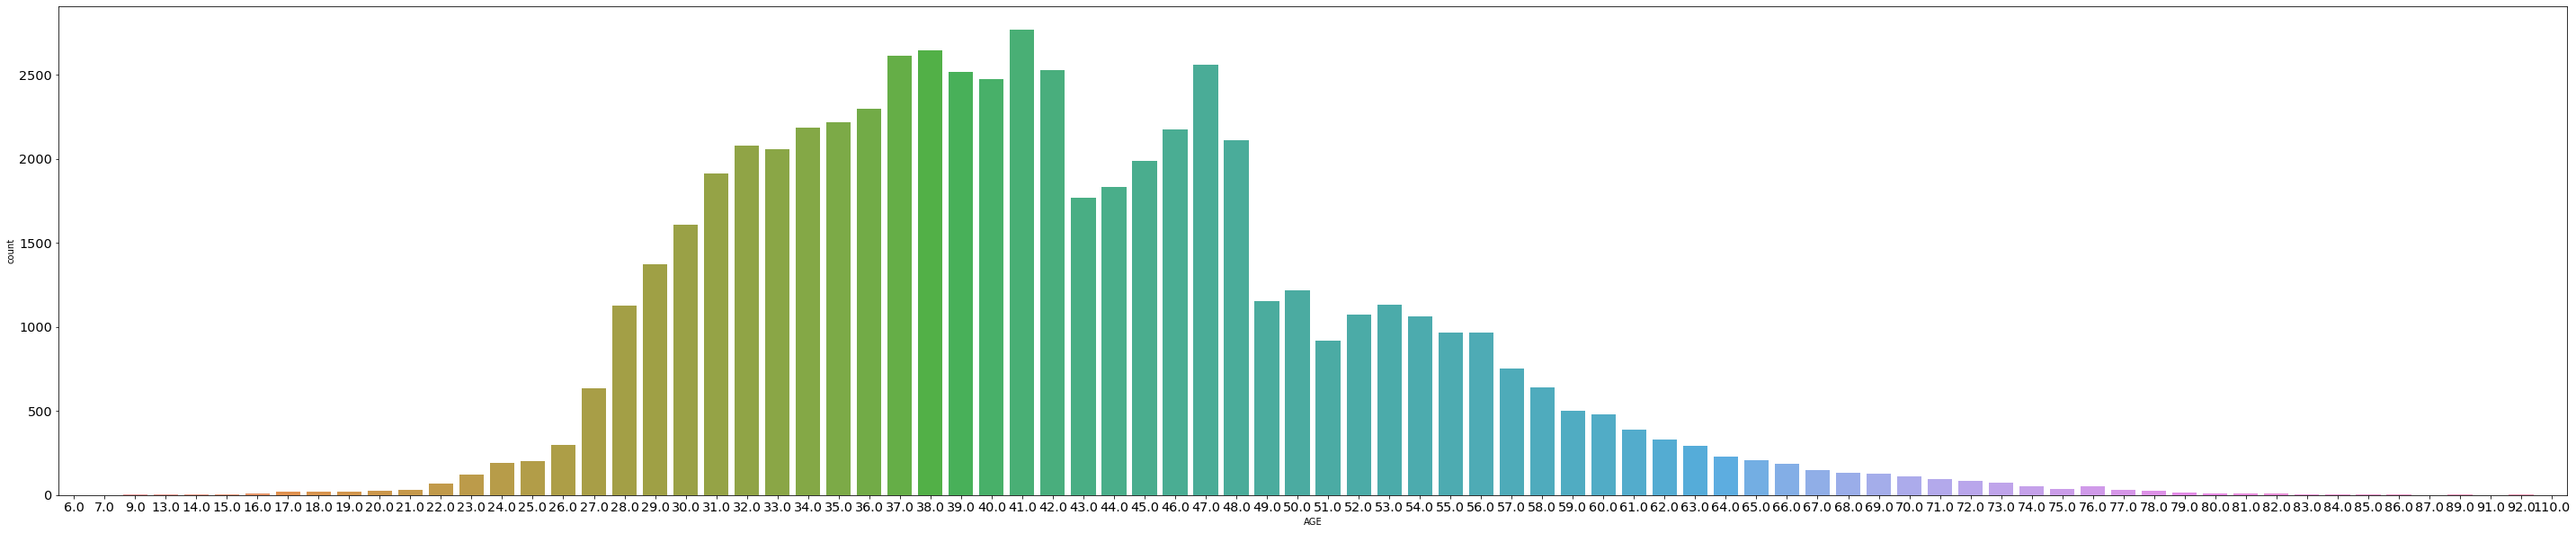

In [ ]:
plt.figure(figsize=(50,10))
ax = sns.countplot(x="AGE", data=df_flight)

## Multivariate Analysis

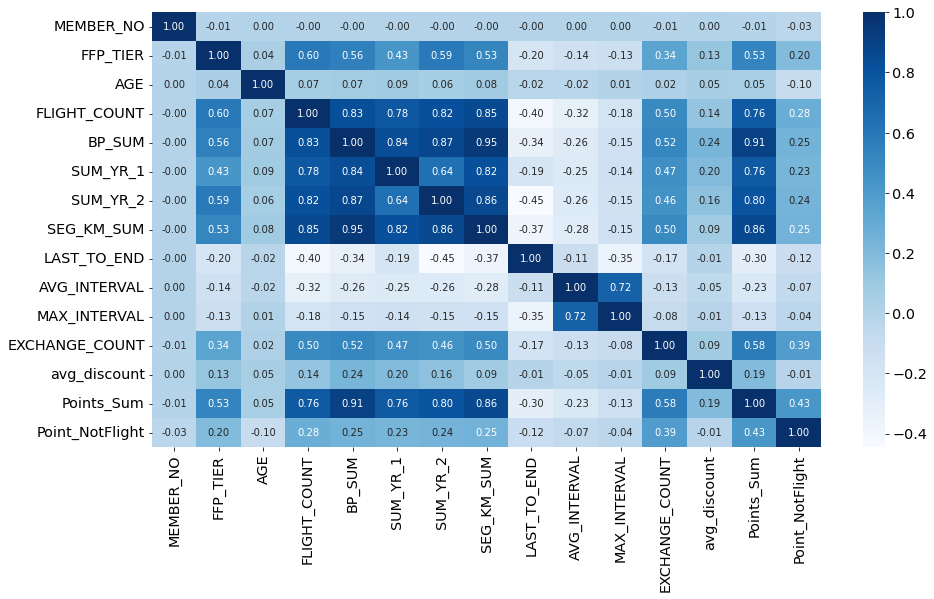

In [ ]:
# correlation heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(df_flight.corr(), cmap='Blues', annot=True, fmt='.2f')

Pengamatan:

1. Kolom (`MEMBER_NO`), (`AGE`), (`LAST_TO_END`), (`AVG_INTERVAL`), (`MAX_INTERVAL`), (`AVG_DISCOUNT`), (`POINT_NotFlight`) memiliki korelasi yang rendah.
2. Fitur (`BP_SUM`), (`SEG_KM_SUM`), (`Points_Sum`) memiliki korelasi yang tinggi maka bisa dipilih salah satu yaitu (`SEG_KM_SUM`)

<Figure size 1080x1080 with 0 Axes>

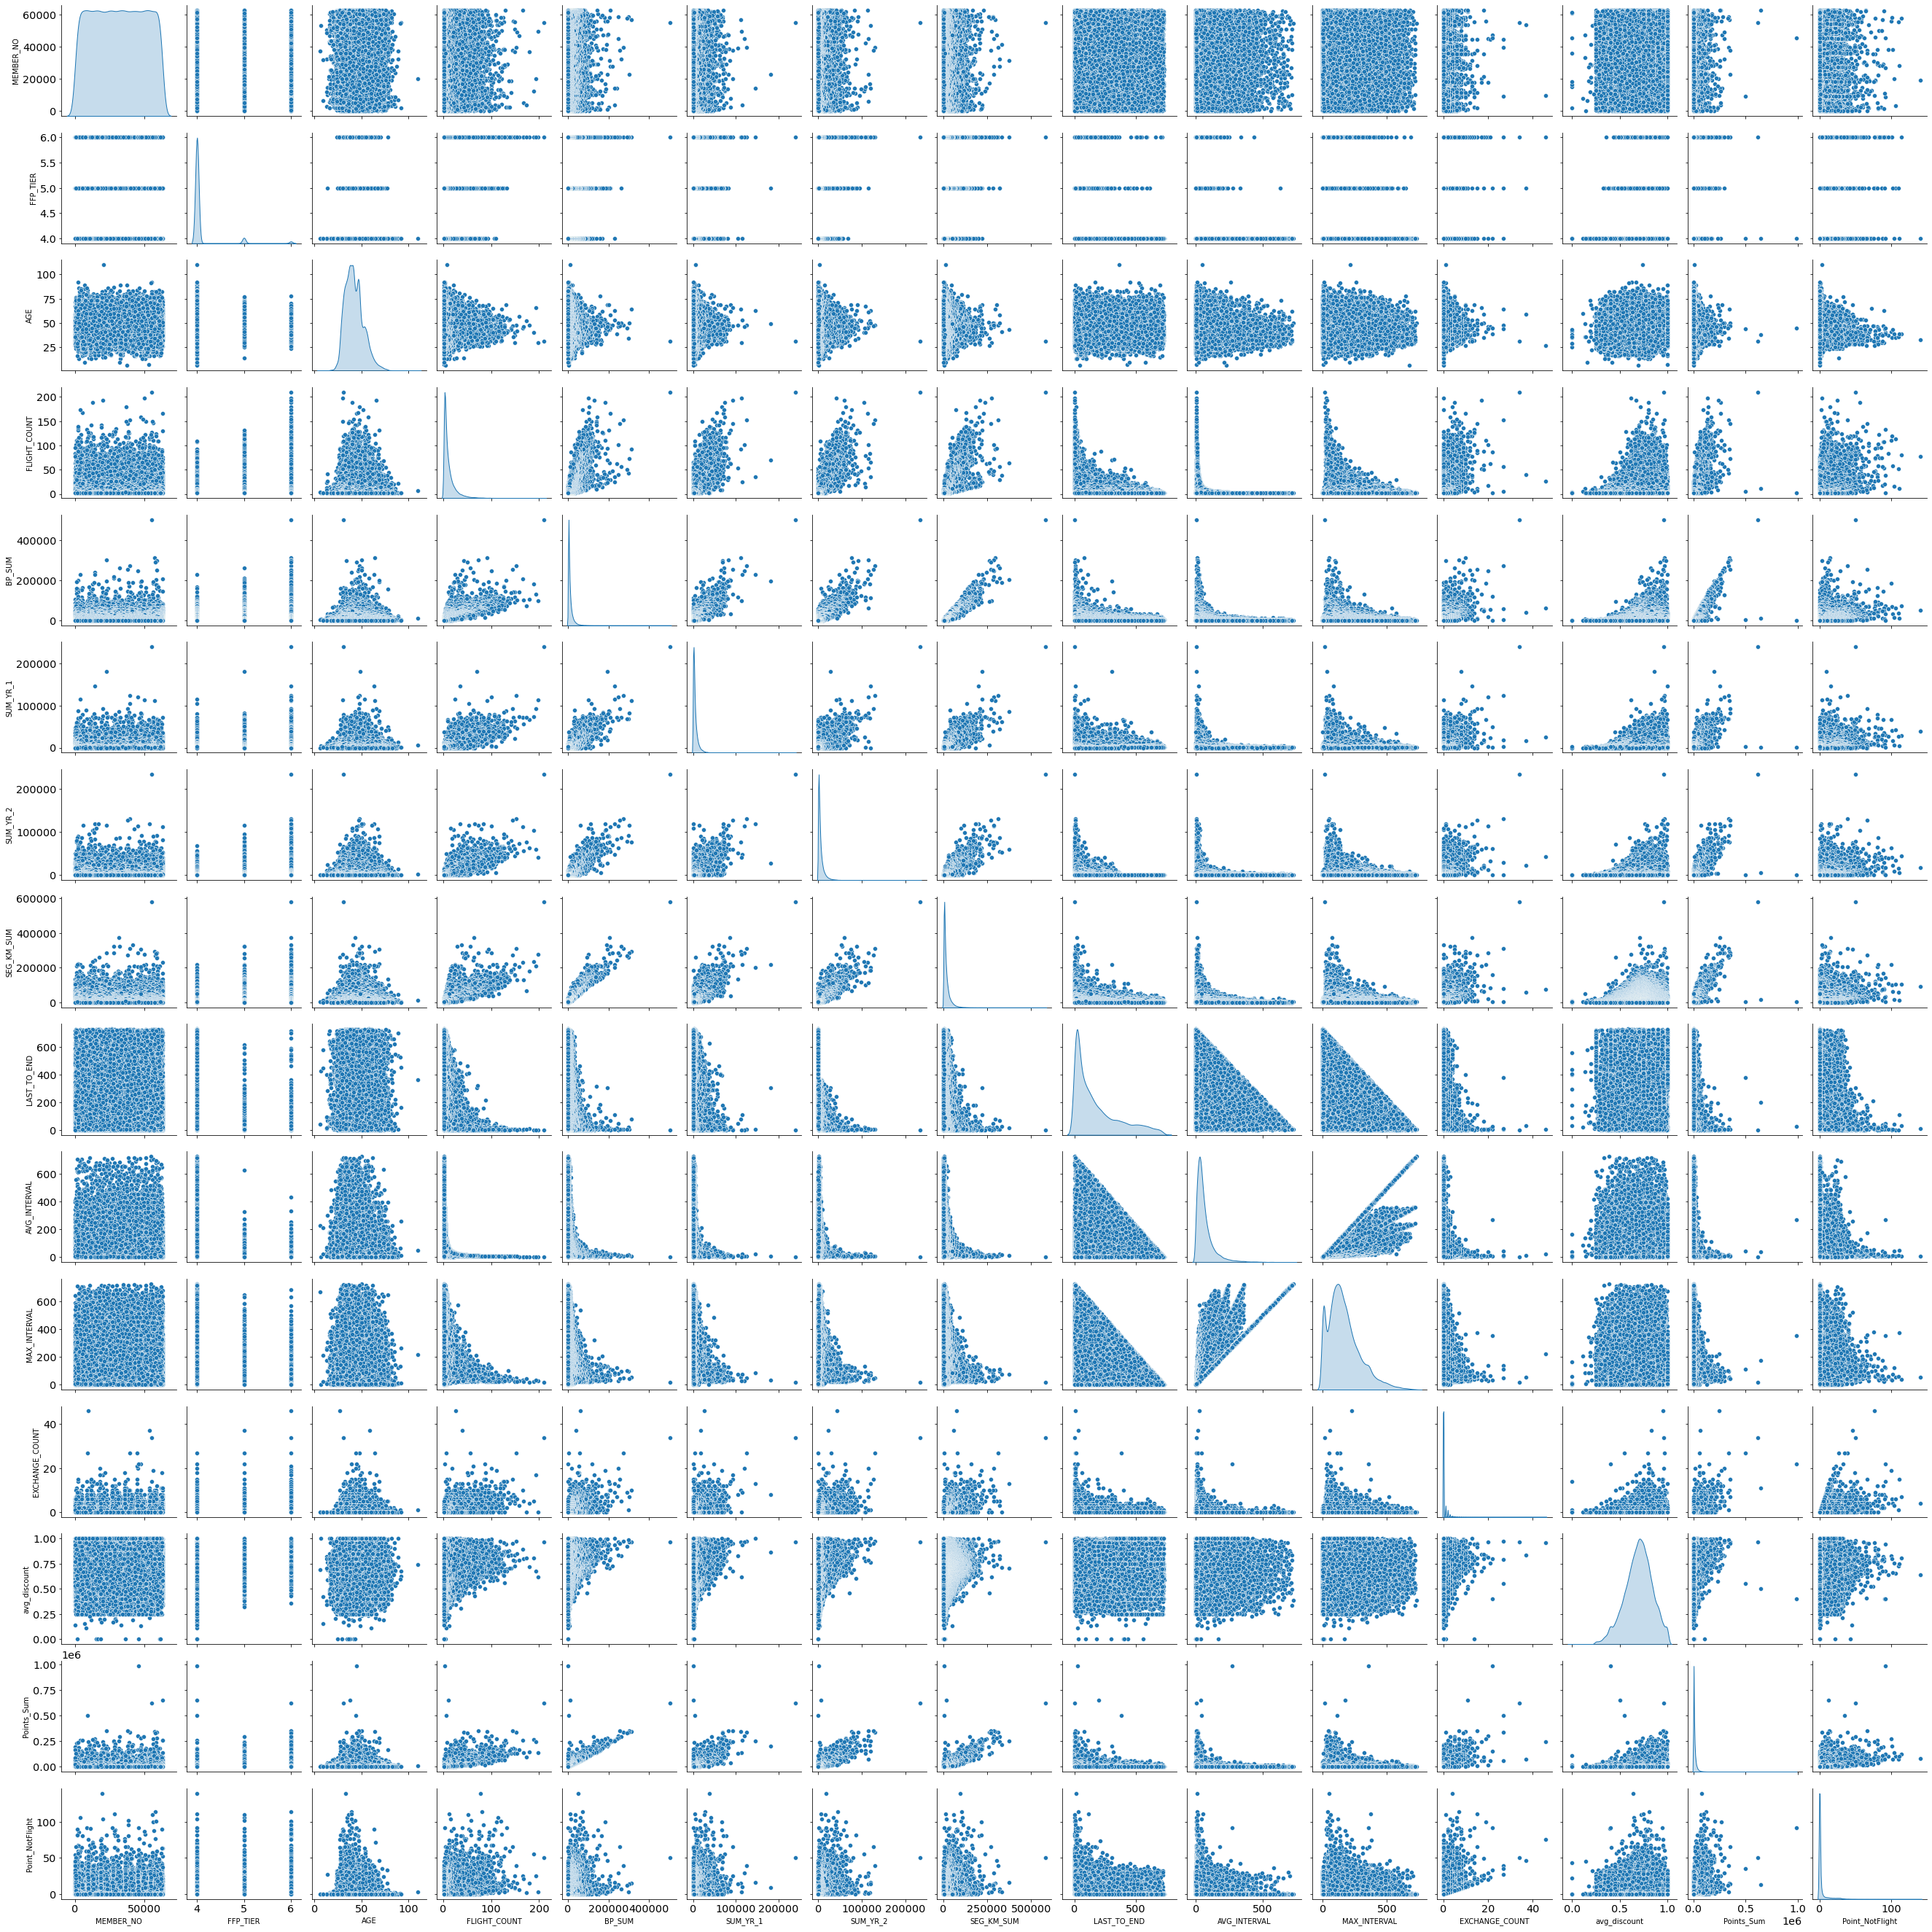

In [ ]:
plt.figure(figsize=(15, 15))
sns.pairplot(df_flight, diag_kind='kde')

# Preprocessing

## Feature Selection

Fitur yang nilai korelasinya rendah dan dianggap tidak berhubungan dalam penyelesaian masalah akan didrop dari dataset: (`member_no`), (`age`), (`exchange_count`), (`sum_yr_1`), (`sum_yr_2`), (`point_notflight`), (`avg_interval`), (`max_interval`), (`avg_discount`)

Dari hasil proses EDA dan referensi [Jurnal](https://jtiik.ub.ac.id/index.php/jtiik/article/view/690) diketahui bahwa fitur penting berdasarkan sumber yang dibaca, dipilih menggunakan model segmentasi LRFM.

Apa itu LRFM?
1. L(Length): Lama periode pelanggan berlangganan
2. R(Recency): Jarak waktu penerbangan terakhir ke pesanan penerbangan terakhir
3. F(Frequency): Berapa kali pelanggan melakukan penerbangan
4. M(Monetary): Total jarak penerbangan yang sudah dilakukan pelanggan

Dari model tersebut dipilihlah 4 fitur yang akan digunakan untuk proses clustering diantaranya:
1. Membership (Month): ini adalah feature baru dari proses feature engineering
2. LAST_TO_END
3. FLIGHT_COUNT
4. SEG_KM_SUM

In [ ]:
df_preprocess = df_flight.copy()

In [ ]:
df_preprocess.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60041 entries, 0 to 62987
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          60041 non-null  int64  
 1   FFP_DATE           60041 non-null  object 
 2   FIRST_FLIGHT_DATE  60041 non-null  object 
 3   GENDER             60041 non-null  object 
 4   FFP_TIER           60041 non-null  int64  
 5   AGE                60041 non-null  float64
 6   LOAD_TIME          60041 non-null  object 
 7   FLIGHT_COUNT       60041 non-null  int64  
 8   BP_SUM             60041 non-null  int64  
 9   SUM_YR_1           60041 non-null  float64
 10  SUM_YR_2           60041 non-null  float64
 11  SEG_KM_SUM         60041 non-null  int64  
 12  LAST_FLIGHT_DATE   60041 non-null  object 
 13  LAST_TO_END        60041 non-null  int64  
 14  AVG_INTERVAL       60041 non-null  float64
 15  MAX_INTERVAL       60041 non-null  int64  
 16  EXCHANGE_COUNT     600

In [ ]:
df_preprocess.head()

MEMBER_NO   FFP_DATE  ... Points_Sum Point_NotFlight
0      54993  11/2/2006  ...     619760              50
4      39546  4/10/2009  ...     338813              39
5      56972  2/10/2008  ...     343121              15
6      44924  3/22/2006  ...     298873              29
7      22631   4/9/2010  ...     351198              14

[5 rows x 20 columns]

## Feature Enggineering

In [ ]:
df_preprocess['FFP_DATE'] = pd.to_datetime(df_preprocess['FFP_DATE'])

In [ ]:
df_preprocess['FIRST_FLIGHT_DATE'] = pd.to_datetime(df_preprocess['FIRST_FLIGHT_DATE'])

In [ ]:
df_preprocess['LOAD_TIME'] = pd.to_datetime(df_preprocess['LOAD_TIME'])

In [ ]:
df_preprocess[df_preprocess['LAST_FLIGHT_DATE'] == '2014/2/29  0:00:00']

MEMBER_NO   FFP_DATE  ... Points_Sum Point_NotFlight
832        20336 2005-07-13  ...      91476              15
1292       40763 2010-11-23  ...      60468               6
1294       46967 2012-12-15  ...      67347               3
1400        5130 2011-01-20  ...      54585              16
1434        3722 2009-02-12  ...      62646               7
...          ...        ...  ...        ...             ...
61539      55995 2013-01-11  ...          0               0
61871      48742 2009-07-26  ...       1094               1
61909       9190 2011-04-11  ...       3356              19
62721      38776 2007-10-31  ...        276               0
62929      46449 2010-02-07  ...       1211               3

[401 rows x 20 columns]

Terdapat pengisian data tanggal yang salah pada bulan februari akhir tahun 2014 yang mana tanggal 29 tidak ada sehingga data tersebut bisa diganti tanggalnya menjadi tanggal 28

In [ ]:
df_preprocess['LAST_FLIGHT_DATE'] = df_preprocess['LAST_FLIGHT_DATE'].replace('2014/2/29  0:00:00', '2014/2/28  0:00:00')

In [ ]:
df_preprocess['LAST_FLIGHT_DATE'] = pd.to_datetime(df_preprocess['LAST_FLIGHT_DATE'])

In [ ]:
# membuat fitur baru
df_preprocess['Membership (Month)'] = (pd.to_datetime(df_preprocess['LOAD_TIME']).dt.year - pd.to_datetime(df_preprocess['FFP_DATE']).dt.year) * 12 + (pd.to_datetime(df_preprocess['LOAD_TIME']).dt.month - pd.to_datetime(df_preprocess['FFP_DATE']).dt.month)

In [ ]:
df_preprocess.head()

MEMBER_NO   FFP_DATE  ... Point_NotFlight Membership (Month)
0      54993 2006-11-02  ...              50                 88
4      39546 2009-04-10  ...              39                 59
5      56972 2008-02-10  ...              15                 73
6      44924 2006-03-22  ...              29                 96
7      22631 2010-04-09  ...              14                 47

[5 rows x 21 columns]

## Normalisasi & Handle Outlier

In [ ]:
feature_ready = [
                 "FLIGHT_COUNT",
                 "SEG_KM_SUM",
                 "LAST_TO_END",
                 "Membership (Month)"
]
df_preprocess[feature_ready].head()

FLIGHT_COUNT  SEG_KM_SUM  LAST_TO_END  Membership (Month)
0           210      580717            1                  88
4           152      309928            5                  59
5            92      294585           79                  73
6           101      287042            1                  96
7            73      287230            3                  47

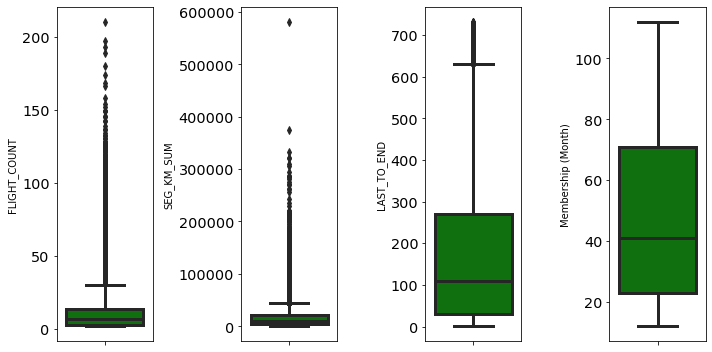

In [ ]:
new_num_col = df_preprocess[feature_ready].columns.to_list()
plt.figure(figsize=(10,5))
for i in range(0, len(new_num_col)):
  plt.subplot(1, len(new_num_col), i+1)
  sns.boxplot(y=df_preprocess[new_num_col[i]], color='green', orient='v')
  plt.tight_layout()

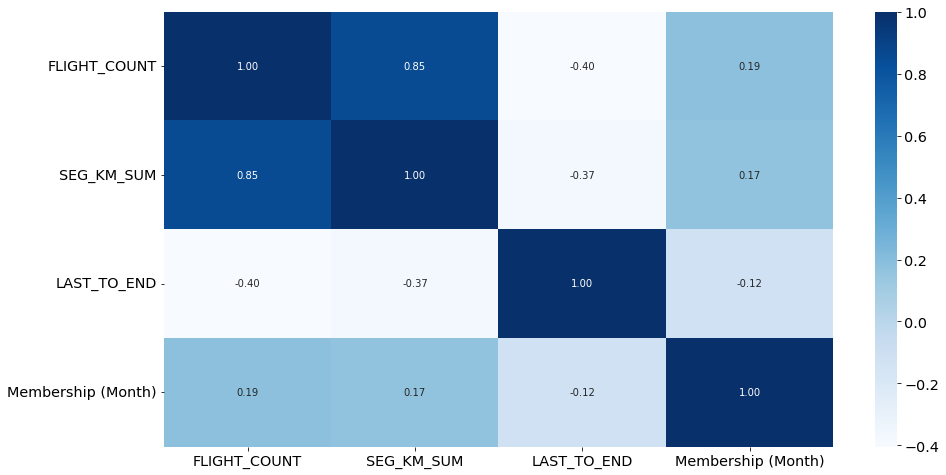

In [ ]:
# correlation heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(df_preprocess[feature_ready].corr(), cmap='Blues', annot=True, fmt='.2f')

### L: Membership (Month)

In [ ]:
df_preprocess['Membership (Month) Log1p'] = np.log1p(df_preprocess['Membership (Month)'])
df_preprocess[['Membership (Month)', 'Membership (Month) Log1p']].describe()

Membership (Month)  Membership (Month) Log1p
count        60041.000000              60041.000000
mean            47.980697                  3.716048
std             27.698848                  0.611895
min             12.000000                  2.564949
25%             23.000000                  3.178054
50%             41.000000                  3.737670
75%             71.000000                  4.276666
max            112.000000                  4.727388

In [ ]:
before_l = df_preprocess.shape[0]
before_l

60041

In [ ]:
Q1 = df_preprocess['Membership (Month) Log1p'].quantile(0.25)
Q3 = df_preprocess['Membership (Month) Log1p'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)

print(low_limit)
print(high_limit)

1.5301353973457814
5.92458455201822


In [ ]:
filtered_entries = ((df_preprocess['Membership (Month) Log1p'] >= low_limit) & (df_preprocess['Membership (Month) Log1p'] <= high_limit))
df_preprocess = df_preprocess[filtered_entries].reset_index(drop = True)
after_l = df_preprocess.shape[0]
after_l

60041

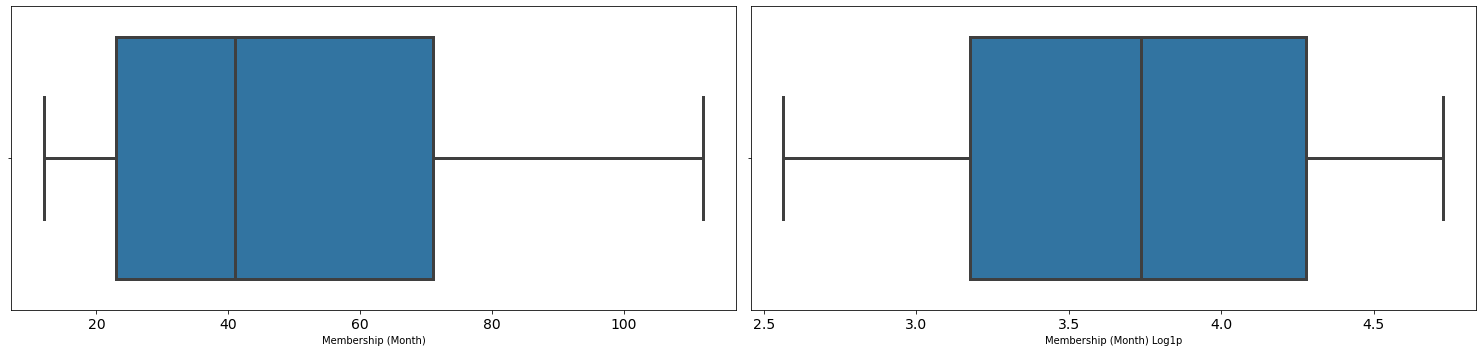

In [ ]:
list_L = ['Membership (Month)', 'Membership (Month) Log1p']

plt.figure(figsize = (20.7, 5))

for i in range(0, len(list_L)):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(
        x = df_preprocess[list_L[i]],
        data = df_preprocess
    )
    
    plt.xticks(fontsize = 14)
    
plt.tight_layout()

### R: LAST_TO_END

In [ ]:
df_preprocess['LAST_TO_END Log1p'] = np.log1p(df_preprocess['LAST_TO_END'])
df_preprocess[['LAST_TO_END', 'LAST_TO_END Log1p']].describe()

LAST_TO_END  LAST_TO_END Log1p
count  60041.000000       60041.000000
mean     177.260855           4.425775
std      184.117824           1.460670
min        1.000000           0.693147
25%       30.000000           3.433987
50%      109.000000           4.700480
75%      270.000000           5.602119
max      731.000000           6.595781

In [ ]:
before_l = df_preprocess.shape[0]
before_l

60041

In [ ]:
Q1 = df_preprocess['LAST_TO_END Log1p'].quantile(0.25)
Q3 = df_preprocess['LAST_TO_END Log1p'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)

print(low_limit)
print(high_limit)

0.18178977989331413
8.854316245471534


In [ ]:
filtered_entries = ((df_preprocess['LAST_TO_END Log1p'] >= low_limit) & (df_preprocess['LAST_TO_END Log1p'] <= high_limit))
df_preprocess = df_preprocess[filtered_entries].reset_index(drop = True)
after_l = df_preprocess.shape[0]
after_l

60041

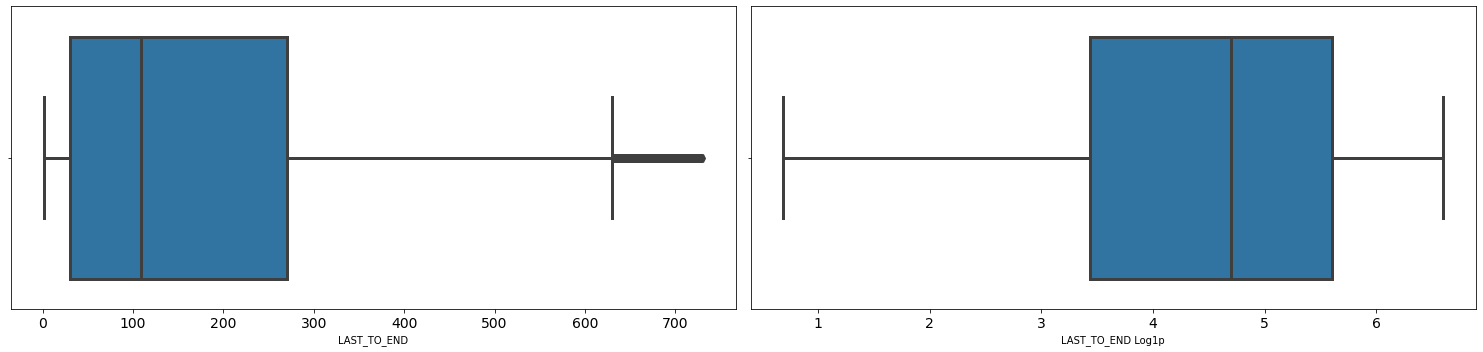

In [ ]:
list_L = ['LAST_TO_END', 'LAST_TO_END Log1p']

plt.figure(figsize = (20.7, 5))

for i in range(0, len(list_L)):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(
        x = df_preprocess[list_L[i]],
        data = df_preprocess
    )
    
    plt.xticks(fontsize = 14)
    
plt.tight_layout()

### F: FLIGHT_COUNT

In [ ]:
df_preprocess['FLIGHT_COUNT Log1p'] = np.log1p(df_preprocess['FLIGHT_COUNT'])
df_preprocess[['FLIGHT_COUNT', 'FLIGHT_COUNT Log1p']].describe()

FLIGHT_COUNT  FLIGHT_COUNT Log1p
count   60041.00000        60041.000000
mean       11.65422            2.156542
std        13.75629            0.827962
min         2.00000            1.098612
25%         3.00000            1.386294
50%         7.00000            2.079442
75%        14.00000            2.708050
max       210.00000            5.351858

In [ ]:
before_l = df_preprocess.shape[0]
before_l

60041

In [ ]:
Q1 = df_preprocess['FLIGHT_COUNT Log1p'].quantile(0.25)
Q3 = df_preprocess['FLIGHT_COUNT Log1p'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)

print(low_limit)
print(high_limit)

-0.5963393988535886
4.690683961075689


In [ ]:
filtered_entries = ((df_preprocess['FLIGHT_COUNT Log1p'] >= low_limit) & (df_preprocess['FLIGHT_COUNT Log1p'] <= high_limit))
df_preprocess = df_preprocess[filtered_entries].reset_index(drop = True)
after_l = df_preprocess.shape[0]
after_l

59953

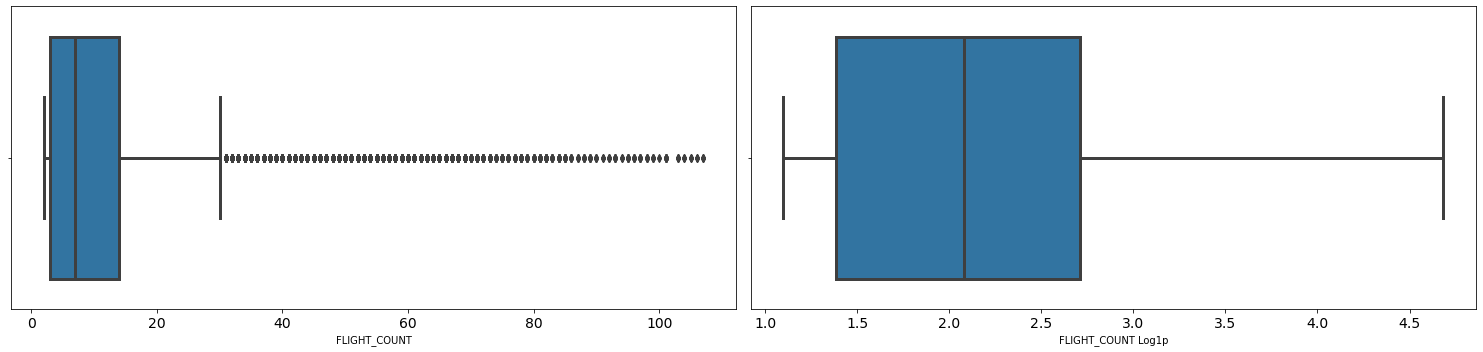

In [ ]:
list_L = ['FLIGHT_COUNT', 'FLIGHT_COUNT Log1p']

plt.figure(figsize = (20.7, 5))

for i in range(0, len(list_L)):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(
        x = df_preprocess[list_L[i]],
        data = df_preprocess
    )
    
    plt.xticks(fontsize = 14)
    
plt.tight_layout()

### M: SEG_KM_SUM

In [ ]:
df_preprocess['SEG_KM_SUM Log1p'] = np.log1p(df_preprocess['SEG_KM_SUM'])
df_preprocess[['SEG_KM_SUM', 'SEG_KM_SUM Log1p']].describe()

SEG_KM_SUM  SEG_KM_SUM Log1p
count   59953.000000      59953.000000
mean    16571.083732          9.213754
std     19506.420314          1.008084
min       368.000000          5.910797
25%      4708.000000          8.457231
50%      9851.000000          9.195430
75%     20812.000000          9.943333
max    375074.000000         12.834881

In [ ]:
before_l = df_preprocess.shape[0]
before_l

59953

In [ ]:
Q1 = df_preprocess['SEG_KM_SUM Log1p'].quantile(0.25)
Q3 = df_preprocess['SEG_KM_SUM Log1p'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)

print(low_limit)
print(high_limit)

6.228077519921509
12.172486400780297


In [ ]:
filtered_entries = ((df_preprocess['SEG_KM_SUM Log1p'] >= low_limit) & (df_preprocess['SEG_KM_SUM Log1p'] <= high_limit))
df_preprocess = df_preprocess[filtered_entries].reset_index(drop = True)
after_l = df_preprocess.shape[0]
after_l

59897

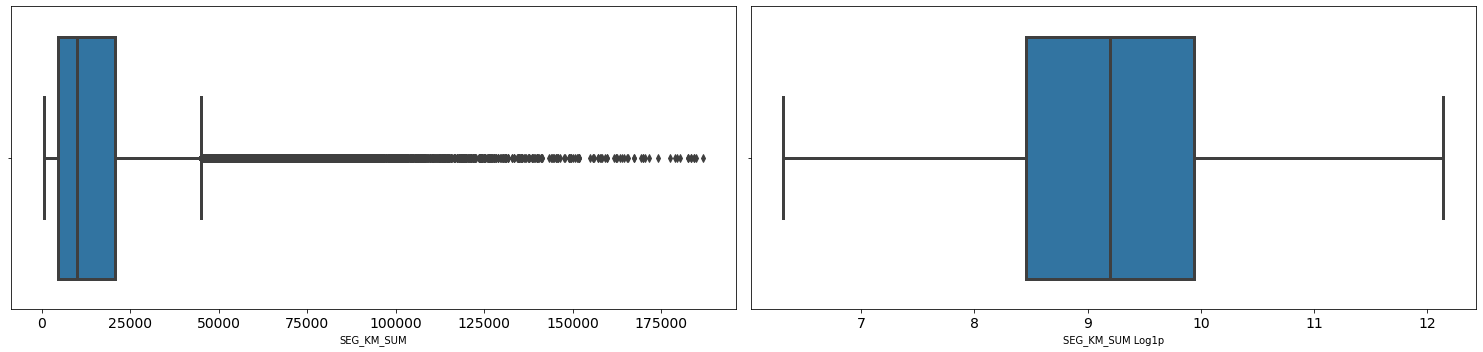

In [ ]:
list_L = ['SEG_KM_SUM', 'SEG_KM_SUM Log1p']

plt.figure(figsize = (20.7, 5))

for i in range(0, len(list_L)):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(
        x = df_preprocess[list_L[i]],
        data = df_preprocess
    )
    
    plt.xticks(fontsize = 14)
    
plt.tight_layout()

## Re-check Outlier

In [ ]:
features_ready_log = [
    'Membership (Month) Log1p',
    'LAST_TO_END Log1p',
    'FLIGHT_COUNT Log1p',
    'SEG_KM_SUM Log1p'
]

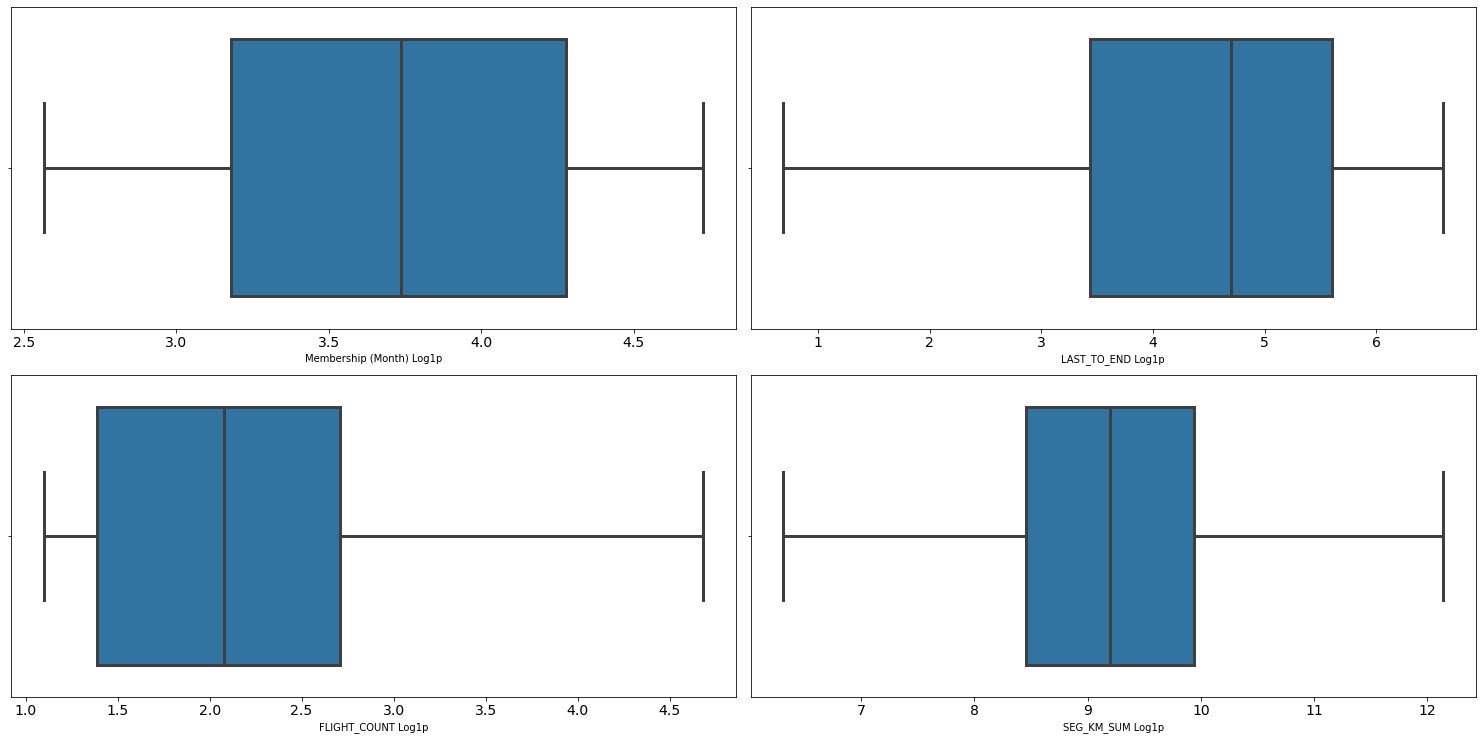

In [ ]:
plt.figure(figsize = (20.7, 15))

for i in range(len(features_ready_log)):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(
        x = df_preprocess[features_ready_log[i]],
        data = df_preprocess
    )
    
    plt.xticks(fontsize = 14)
    
plt.tight_layout()

In [ ]:
df_preprocess.shape

(59897, 25)

## Standarisasi

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

col_name = [
    'Membership (Month) Log1p',
    'LAST_TO_END Log1p',
    'FLIGHT_COUNT Log1p',
    'SEG_KM_SUM Log1p'
]

std_scaler = StandardScaler()
X = std_scaler.fit_transform(df_preprocess[col_name].astype(float))

In [ ]:
X

array([[ 0.18542512, -1.70505796,  2.78946988,  2.91389503],
       [ 1.02750906,  0.04004183,  1.63726194,  2.89092438],
       [ 0.72523615, -1.61341396,  1.56112503,  2.89978583],
       ...,
       [ 1.40494586, -0.706279  , -1.28288011, -1.34693683],
       [-1.75906167,  1.07316227, -1.28288011, -0.93214455],
       [-1.75906167,  1.07827765, -1.28288011, -0.86176959]])

# Modeling + Evaluasi

[239588.00000000012, 140244.19270945666, 112285.3245792703, 93339.0287276647, 80678.19576591835, 71950.88226050812, 64695.911324965135, 59986.84105338602, 55838.607183184366, 52576.02721005054]


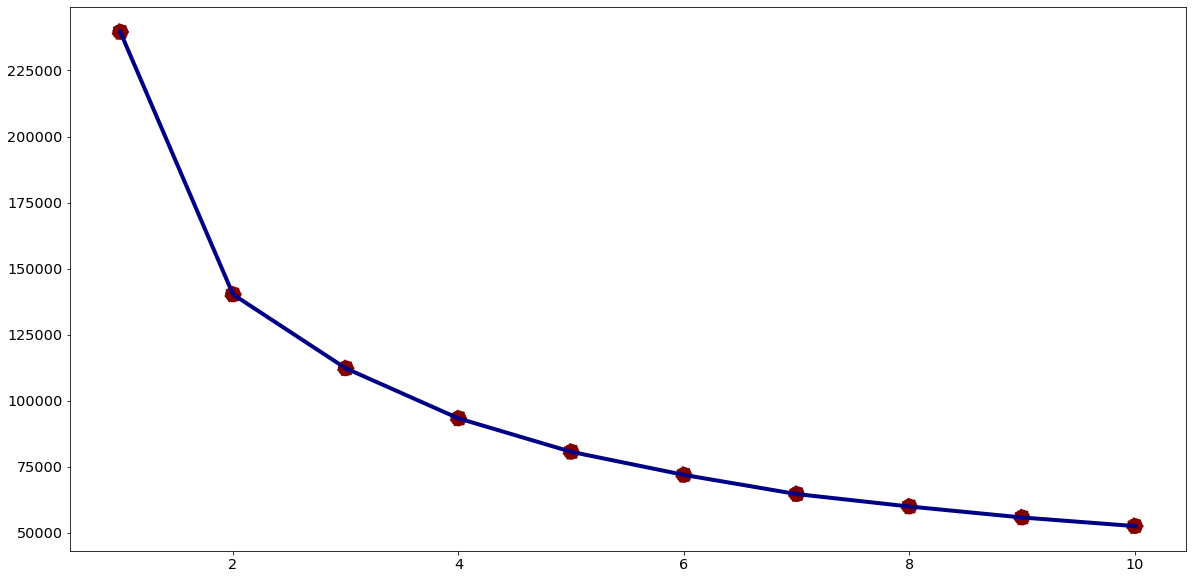

In [ ]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0, init = 'k-means++')
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)


print(inertia)

plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(1, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 11), y=inertia, s=300, color='#800000',  linestyle='--')


## Percobaan 4 Clustering

In [ ]:
from sklearn.cluster import KMeans
kmeans_c4 = KMeans(n_clusters=4, random_state=0, init = 'k-means++')
kmeans_c4.fit(X)

KMeans(n_clusters=4, random_state=0)

In [ ]:
## melakukan PCA untuk melihat visualisasi
from sklearn.decomposition import PCA 
pca = PCA(n_components=3)
pca_fit = pca.fit(X)

<BarContainer object of 3 artists>

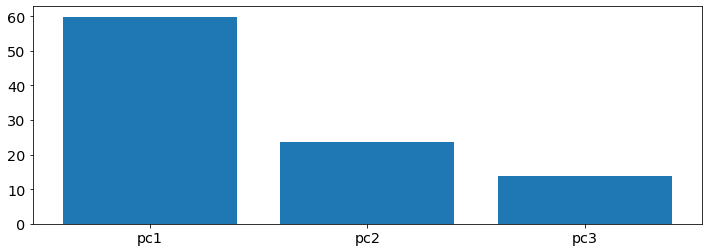

In [ ]:
plt.bar(['pc1', 'pc2', 'pc3'], pca.explained_variance_ratio_ * 100)

In [ ]:
print(pca.explained_variance_ratio_)

[0.59871382 0.23676234 0.13814854]


In [ ]:
new_pca = PCA(n_components=2)
new_pca.fit(X)
pcs = new_pca.transform(X)

In [ ]:
data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['cluster'] = kmeans_c4.labels_
data_pca.head()

PC 1      PC 2  cluster
0  4.297998  0.628190        3
1  2.894778 -0.571396        3
2  3.602907 -0.023197        3
3  2.862259  0.423160        3
4  2.412363  2.348568        1

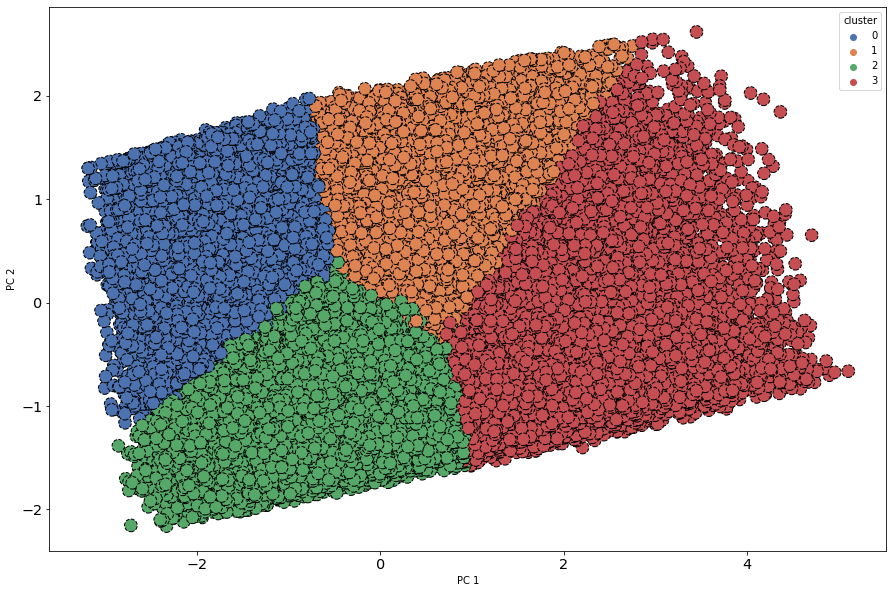

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="cluster",
    edgecolor='black',
    linestyle='--',
    data=data_pca,
    palette="deep",
    s=160,
    ax=ax
)

## Evaluasi Clustering dengan Silhoutte Score

In [ ]:
from sklearn.metrics import silhouette_score
range_n_clusters = [2,3,4,5,6,7,8,9,10,11]

for num_clusters in range_n_clusters :
    
    #inisialisasi kmeans model
    km = KMeans(n_clusters = num_clusters , init= 'k-means++', max_iter = 300, random_state = 0)
    km.fit_predict(X)
    
    cluster_labels = km.labels_
    
    silhouette_avg=silhouette_score(X, cluster_labels, metric = 'euclidean')
    
    print('For n_cluster = {0}, and silhouette_score is {1}'.format(num_clusters,silhouette_avg))

For n_cluster = 2, and silhouette_score is 0.3507269021091182
For n_cluster = 3, and silhouette_score is 0.28913664611940987
For n_cluster = 4, and silhouette_score is 0.2764352447490398
For n_cluster = 5, and silhouette_score is 0.2618862426472441
For n_cluster = 6, and silhouette_score is 0.27102292176918114
For n_cluster = 7, and silhouette_score is 0.2664024329684652
For n_cluster = 8, and silhouette_score is 0.24698704296225255
For n_cluster = 9, and silhouette_score is 0.251774937939954
For n_cluster = 10, and silhouette_score is 0.2398898826187554
For n_cluster = 11, and silhouette_score is 0.24327829094045206


Berdasarkan evaluasi nilai silhoutte score di dapatkan kalau 2 cluster memiliki nilai yang tinggi dibandingkan cluster yang lain

## Percobaan 2 Clustering

In [ ]:
from sklearn.cluster import KMeans
kmeans_c2 = KMeans(n_clusters=2, random_state=0, init = 'k-means++')
kmeans_c2.fit(X)

KMeans(n_clusters=2, random_state=0)

In [ ]:
## melakukan PCA untuk melihat visualisasi
from sklearn.decomposition import PCA 
pca = PCA(n_components=3)
pca_fit = pca.fit(X)

<BarContainer object of 3 artists>

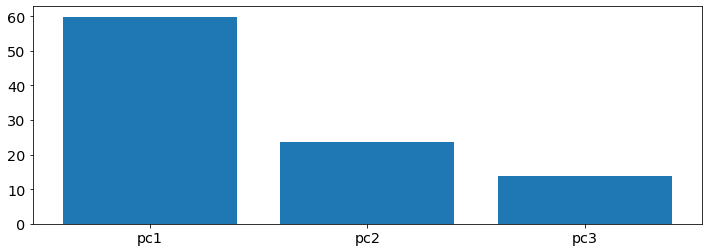

In [ ]:
plt.bar(['pc1', 'pc2', 'pc3'], pca.explained_variance_ratio_ * 100)

In [ ]:
print(pca.explained_variance_ratio_)

[0.59871382 0.23676234 0.13814854]


In [ ]:
new_pca = PCA(n_components=2)
new_pca.fit(X)
pcs = new_pca.transform(X)

In [ ]:
data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['cluster'] = kmeans_c2.labels_
data_pca.head()

PC 1      PC 2  cluster
0  4.297998  0.628190        0
1  2.894778 -0.571396        0
2  3.602907 -0.023197        0
3  2.862259  0.423160        0
4  2.412363  2.348568        0

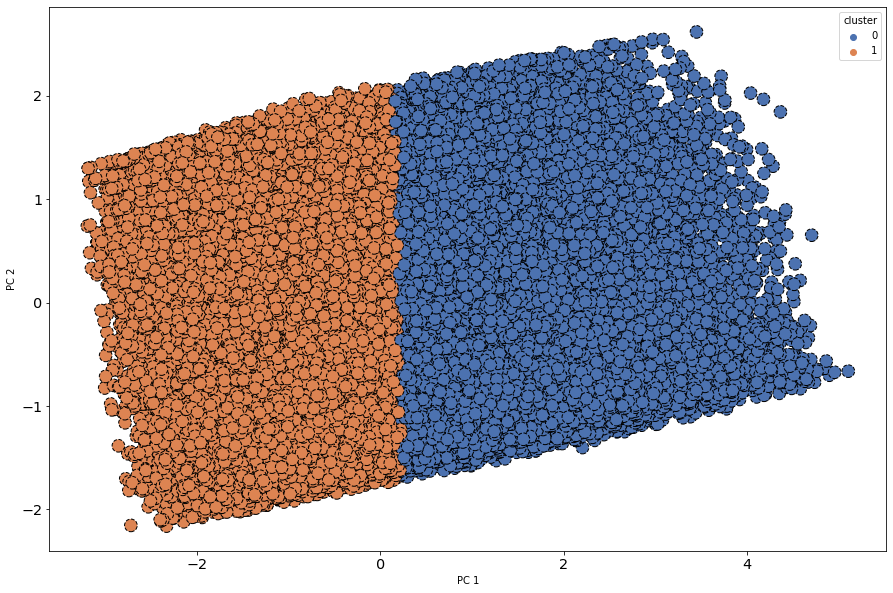

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="cluster",
    edgecolor='black',
    linestyle='--',
    data=data_pca,
    palette="deep",
    s=160,
    ax=ax
)

In [ ]:
df_preprocess['cluster'] = kmeans_c2.labels_
df_preprocess.head()

MEMBER_NO   FFP_DATE  ... SEG_KM_SUM Log1p cluster
0      16812 2010-06-09  ...        12.137912       0
1      38456 2007-11-15  ...        12.114856       0
2      47919 2008-12-14  ...        12.123750       0
3      13517 2010-08-14  ...        12.045945       0
4      56048 2013-03-15  ...        12.038984       0

[5 rows x 26 columns]

# Insight + Rekomendasi

In [ ]:
features_cluster = [
    'Membership (Month) Log1p',
    'LAST_TO_END Log1p',
    'FLIGHT_COUNT Log1p',
    'SEG_KM_SUM Log1p',
    'cluster'
]

In [ ]:
df_preprocess[features_cluster].head()

Membership (Month) Log1p  LAST_TO_END Log1p  ...  SEG_KM_SUM Log1p  cluster
0                  3.828641           1.945910  ...         12.137912        0
1                  4.343805           4.488636  ...         12.114856        0
2                  4.158883           2.079442  ...         12.123750        0
3                  3.784190           3.135494  ...         12.045945        0
4                  2.564949           3.401197  ...         12.038984        0

[5 rows x 5 columns]

In [ ]:
# re transform
df_preprocess['MEMBERSHIP_MONTH_COUNT_exp'] = np.expm1(df_preprocess['Membership (Month) Log1p'])
df_preprocess['LAST_TO_END_exp'] = np.expm1(df_preprocess['LAST_TO_END Log1p'])
df_preprocess['FLIGHT_COUNT_exp'] = np.expm1(df_preprocess['FLIGHT_COUNT Log1p'])
df_preprocess['SEG_KM_SUM_exp'] = np.expm1(df_preprocess['SEG_KM_SUM Log1p'])

In [ ]:
features_cluster_retransformed = [
    'MEMBERSHIP_MONTH_COUNT_exp', 'LAST_TO_END_exp', 'FLIGHT_COUNT_exp', 'SEG_KM_SUM_exp', 'cluster'
]

In [ ]:
df_preprocess[features_cluster_retransformed]

MEMBERSHIP_MONTH_COUNT_exp  LAST_TO_END_exp  ...  SEG_KM_SUM_exp  cluster
0                            45.0              6.0  ...        186821.0        0
1                            76.0             88.0  ...        182563.0        0
2                            63.0              7.0  ...        184194.0        0
3                            43.0             22.0  ...        170406.0        0
4                            12.0             29.0  ...        169224.0        0
...                           ...              ...  ...             ...      ...
59892                        34.0            297.0  ...          1134.0        1
59893                        48.0             89.0  ...          8016.0        1
59894                        96.0             29.0  ...          2594.0        1
59895                        13.0            400.0  ...          3934.0        1
59896                        13.0            403.0  ...          4222.0        1

[59897 rows x 5 columns]

In [ ]:
dfs = df_preprocess[features_cluster_retransformed]

In [ ]:
display(dfs.groupby('cluster').agg(['mean', 'median']))

MEMBERSHIP_MONTH_COUNT_exp         ... SEG_KM_SUM_exp         
                              mean median  ...           mean   median
cluster                                    ...                        
0                        54.836576   51.0  ...   29922.730036  23145.5
1                        42.790210   35.0  ...    6395.403108   5326.0

[2 rows x 8 columns]

In [ ]:
df_preprocess['cluster'].value_counts()

1    34301
0    25596
Name: cluster, dtype: int64

Keterangan column:
1. MEMBERSHIP_MONTH_COUNT_exp: Lama pelanggan berlangganan dari tanggal pelanggan berlangganan hingga data ini diambil
2. LAST_TO_END_exp: jarak waktu penerbangan terakhir ke pesanan penerbangan paling akhir
3. FLIGHT_COUNT_exp: jumlah penerbangan yang dilakukan oleh pelanggan
4. SEG_KM_SUM_exp: Total jarak penerbangan yang sudah dilakukan oleh pelanggan

Makna dari cluster:
1. Cluster 0 merupakan pelanggan yang sudah lama berlangganan dengan jumlah penerbangan yang banyak dan total jarak penerbangan yang panjang.
2. Cluster 1 merupakan pelanggan member yang memiliki durasi penerbangan yang sedikit dan total jarak penerbangan yang pendek.

Businnes Insight
1. Untuk customer di cluster 0 harus lebih diperhatikan dengan peningkatan customer service dan juga bisa diberikan banyak penawaran-penawaran yang menarik. Customer di cluster ini lebih baik diberi penawaran berupa poin karena mereka adalah customer yang sering berpergian. Customer 0 juga lebih sedikit dan harus dipertahankan. Business Metrics: Retention Rate.
2. Untuk customer di cluster 1 harus lebih diperhatikan dengan pemberian diskon dan promo karena mereka adalah tipe customer yang cenderung tidak terlalu loyal dan berpergian hanya sesekali. Cluster 1 memiliki jumlah yang lebih banyak. Hal ini bisa memberi insight bahwa masih banyak peluang di cluster 1 agar mereka pindah menuju cluster 0. Business Metrics: Churn Rate